<a href="https://colab.research.google.com/github/granantuin/LEVX_regression/blob/master/Display_regre_LEVX_dir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
drive_metar="/content/drive/My Drive/Colab Notebooks/model_vs_data/Metar_2018/"
dr=[drive_4km,drive_1km,drive_metar]
y_data=pd.read_excel(dr[2]+"y_LEVX_dir.xlsx",index_col=0)
x_data=pd.read_csv(dr[2]+"x_LEVX.csv",index_col=0)
x_data=x_data.iloc[:,0:9]
y_data=y_data[y_data>0]# delete station errors
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result.iloc[:,9:10]

In [13]:
y_data.describe()

,value
count,6706.000000
mean,197.216224
std,96.559469
min,10.000000
25%,180.000000
50%,210.000000
75%,260.000000
max,360.000000


In [14]:
x_data.describe()

,0,1,2,3,4,5,6,7,8
count,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000
mean,202.611930,208.045731,208.979718,185.839959,213.542731,210.897068,189.612311,209.744967,201.993788
std,104.719044,105.966631,108.106277,102.864678,99.110239,100.978526,100.609803,94.126899,99.209816
min,0.005546,0.059805,0.015955,0.004262,0.011393,0.243565,0.026720,0.042866,0.026938
25%,123.450954,122.639519,123.120085,107.338276,139.874969,126.467817,122.359901,140.456303,120.706581
50%,200.364281,209.059570,214.826431,182.692093,212.253288,209.316063,194.348999,210.316307,194.466972
75%,297.100792,300.518997,305.612801,275.406479,298.876770,305.079521,259.450729,288.404350,294.421410
max,359.986725,359.988281,359.983948,359.924500,359.925232,359.980194,359.997559,359.969696,359.947845


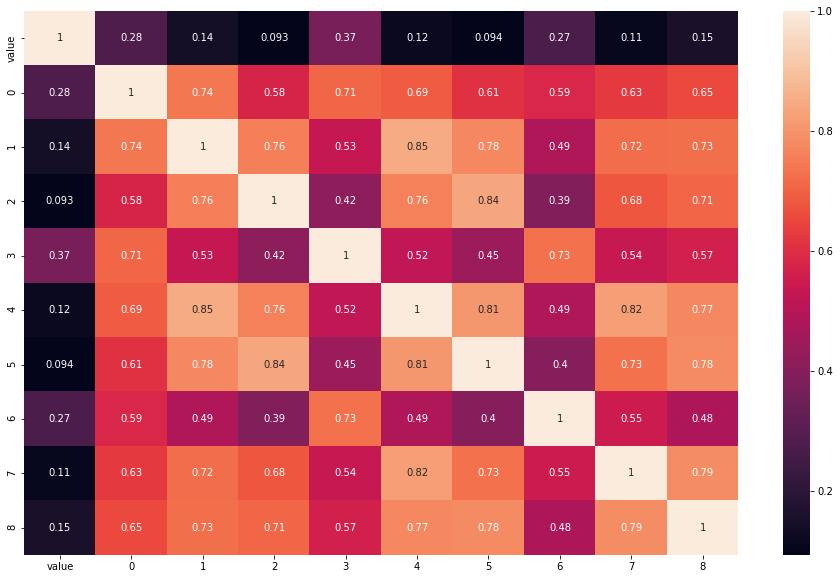

In [15]:
df2=pd.concat([y_data, x_data], axis=1)
plt.figure(figsize=(16, 10))
sns.heatmap(df2.corr(),annot=True)

<Figure size 1152x720 with 0 Axes>

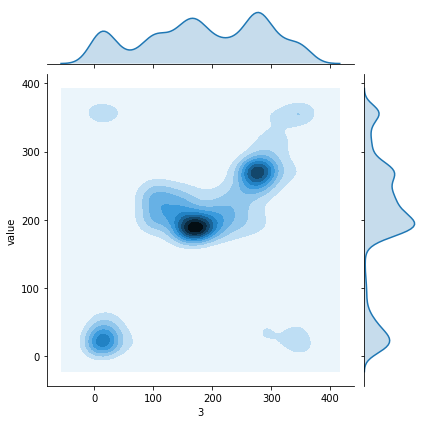

In [16]:
plt.figure(figsize=(16, 10))
ax=sns.jointplot("3", "value", data=df2, kind="kde",)

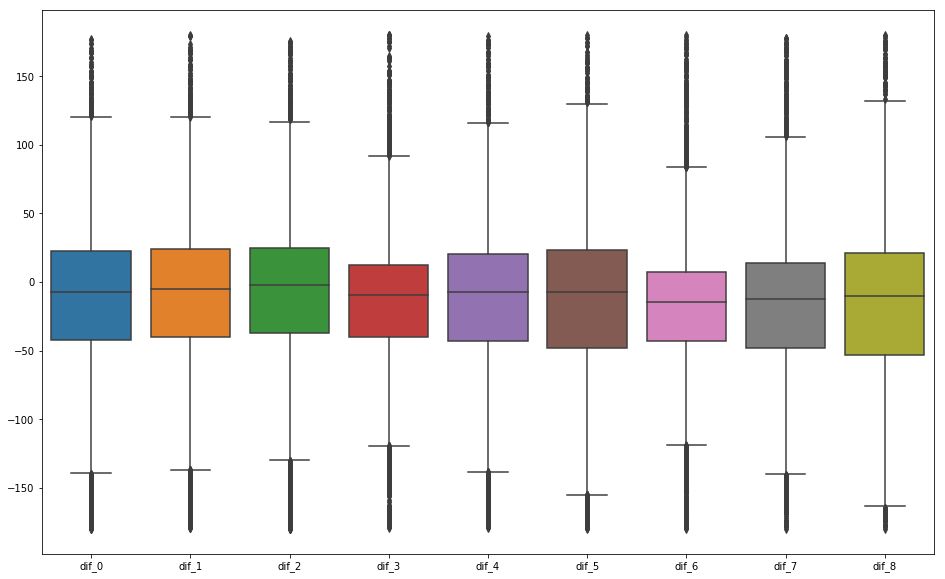

In [17]:
for column in df2.columns:
  df2["dif_"+column]=df2[column]-df2["value"]
  df2["dif_"+column]=df2["dif_"+column][df2["dif_"+column]<180]
  df2["dif_"+column]=df2["dif_"+column][df2["dif_"+column]>-180]
plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=df2.iloc[:,11:20])